In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing the scrapped dataset
df=pd.read_csv("C:/Projects/Project Bi/data/hellowork_400pages.csv")
df

,titre,entreprise,localisation,salaire,date_publication,description
0,Conseiller de Vente - CDI 35H - Boutique H/F,Tara Jarmon,Nice - 06,NaN,2025-12-16 17:08:30.245958,Conseiller de Vente - CDI 35H - Boutique H/F à...
1,Poseur de Menuiserie H/F,Art & Fenêtres,Cusset - Vichy - 03,1 850 - 3 000 € / mois,2025-12-16 17:08:30.246736,Poseur de Menuiserie H/F à Cusset - Vichy - 03...
2,Animateur Commercial Multi-Sites H/F,123 Pare-Brise,Tours - 37,2 081 - 4 581 € / mois,2025-12-16 16:08:30.247158,Animateur Commercial Multi-Sites H/F à Tours -...
3,Conseiller Commercial - Saint Chamond H/F,Groupama Rhône Alpes Auvergne,Saint-Chamond - 42,NaN,2025-12-16 17:08:30.247520,Conseiller Commercial - Saint Chamond H/F à Sa...
4,Customer Success H/F,Airria,Meylan - 38,NaN,2025-12-16 17:08:30.247854,"Customer Success H/F à Meylan - 38, chez Airri..."
...,...,...,...,...,...,...
11995,Comptable H/F,ACD Groupe,Saint-Grégoire - 35,NaN,2025-12-16 14:39:12.542859,"Comptable H/F à Saint-Grégoire - 35, chez ACD ..."
11996,Assistant Comptable H/F,ACD Groupe,Aix-en-Provence - 13,NaN,2025-12-16 14:39:12.543187,Assistant Comptable H/F à Aix-en-Provence - 13...
11997,Responsable de Magasin - CDI - 35H - Mont Sain...,Adopt',Mont-Saint-Aignan - 76,NaN,2025-12-16 14:39:12.543521,Responsable de Magasin - CDI - 35H - Mont Sain...
11998,Pharmacien Adjoint H/F,Medijob,Nogent-le-Rotrou - 28,3 045 - 3 654 € / mois,2025-12-16 14:39:12.543859,Pharmacien Adjoint H/F à Nogent-le-Rotrou - 28...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   titre             12000 non-null  object
 1   entreprise        12000 non-null  object
 2   localisation      12000 non-null  object
 3   salaire           6732 non-null   object
 4   date_publication  12000 non-null  object
 5   description       12000 non-null  object
dtypes: object(6)
memory usage: 562.6+ KB


In [4]:
df=df.dropna(subset=['salaire'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6732 entries, 1 to 11999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   titre             6732 non-null   object
 1   entreprise        6732 non-null   object
 2   localisation      6732 non-null   object
 3   salaire           6732 non-null   object
 4   date_publication  6732 non-null   object
 5   description       6732 non-null   object
dtypes: object(6)
memory usage: 368.2+ KB


In [5]:
for col in df.columns:
    print("="*80)
    print(f"📌 Colonne : {col}")
    print(f"Type : {df[col].dtype}")
    print(f"Valeurs uniques : {df[col].nunique()}")
    print(f"Valeurs manquantes : {df[col].isna().sum()} ({df[col].isna().mean()*100:.2f}%)")
    print("-"*80)

    value_counts = df[col].value_counts(dropna=False)
    percentages = (value_counts / len(df)) * 100

    summary = pd.DataFrame({
    "Valeur": value_counts.index.astype(str),
    "Fréquence": value_counts.values,
    "Pourcentage (%)": percentages.round(2)
    })

    print(summary.head().to_string(index=False))
    print("\n")

📌 Colonne : titre
Type : object
Valeurs uniques : 52
Valeurs manquantes : 0 (0.00%)
--------------------------------------------------------------------------------
                               Valeur  Fréquence  Pourcentage (%)
     Technicien Vitrage Itinérant H/F        405             6.02
Assistant Dentaire Qualifié - CDI H/F        294             4.37
                Technicien Alarme H/F        265             3.94
            Mécanicien Automobile H/F        251             3.73
                    Technicien BE H/F        250             3.71


📌 Colonne : entreprise
Type : object
Valeurs uniques : 37
Valeurs manquantes : 0 (0.00%)
--------------------------------------------------------------------------------
        Valeur  Fréquence  Pourcentage (%)
123 Pare-Brise        880            13.07
         Otteo        588             8.73
     CLINADENT        586             8.70
 Squiban Group        500             7.43
        Sodexo        300             4.46


📌 Colon

In [6]:
def extraire_type_contrat(description):
    """Extraire le type de contrat depuis la description"""
    if pd.isna(description):
        return None

    description_lower = description.lower()

    # Recherche des types de contrat
    if 'cdi' in description_lower:
        return 'CDI'
    elif 'cdd' in description_lower:
        return 'CDD'
    elif 'intérim' in description_lower or 'interim' in description_lower:
        return 'Intérim'
    elif 'stage' in description_lower:
        return 'Stage'
    elif 'alternance' in description_lower:
        return 'Alternance'
    elif 'apprentissage' in description_lower:
        return 'Apprentissage'
    else:
        return 'Non spécifié'

In [7]:
def extraire_temps_travail(description):
    """Extraire le temps de travail depuis la description"""
    if pd.isna(description):
        return None

    description_lower = description.lower()

    # Recherche du temps de travail
    if 'temps plein' in description_lower:
        return 'Temps plein'
    elif 'temps partiel' in description_lower:
        return 'Temps partiel'
    elif 'plein temps' in description_lower:
        return 'Temps plein'
    elif 'partiel' in description_lower:
        return 'Temps partiel'
    elif 'mi-temps' in description_lower:
        return 'Mi-temps'
    else:
        return 'Non spécifié'

In [8]:
# 3. Appliquer les transformations
df['type_contrat'] = df['description'].apply(extraire_type_contrat)
df['temps_travail'] = df['description'].apply(extraire_temps_travail)

C:\Users\asus0\AppData\Local\Temp\ipykernel_4464\1033391980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type_contrat'] = df['description'].apply(extraire_type_contrat)
C:\Users\asus0\AppData\Local\Temp\ipykernel_4464\1033391980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temps_travail'] = df['description'].apply(extraire_temps_travail)


In [9]:
print("\nVérification des transformations :")
print(f"Types de contrat uniques : {df['type_contrat'].unique()}")
print(f"Temps de travail uniques : {df['temps_travail'].unique()}")


Vérification des transformations :
Types de contrat uniques : ['CDI']
Temps de travail uniques : ['Temps plein' 'Temps partiel']


In [10]:
df["salaire"] = df["salaire"].str.replace("\u202f", "", regex=False) \
                                   .str.replace("\u00a0", "", regex=False) \
                                   .str.replace(" ", "", regex=False)
df['salaire'].value_counts()

C:\Users\asus0\AppData\Local\Temp\ipykernel_4464\2889762548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salaire"] = df["salaire"].str.replace("\u202f", "", regex=False) \


salaire
11                  538
2500-2800€/mois     405
27000-29000€/an     294
3045-3654€/mois     289
2200-2800€/mois     254
1900-2500€/mois     251
13-16€/heure        250
13-17€/heure        250
2091-3800€/mois     190
2081-4581€/mois     190
32000-40000€/an     155
21621               155
30000-35000€/an     155
55000-65000€/an     153
23500-25500€/an     150
2400€/mois          150
26000-30000€/an     150
23850-23870€/an     150
12                  150
2000€/mois          150
40000-45000€/an     150
1900-2100€/mois     149
35000-45000€/an     146
38000-45000€/an     146
8000-12000€/mois    146
2000-2200€/mois     146
40000-50000€/an     146
30000-40000€/an     145
1801                105
45000-60000€/an     100
45000-55000€/an      96
1829                 95
1900-2300€/mois      95
2524-4000€/mois      95
1850-3000€/mois      95
50000€/an            95
29000-33000€/an      89
32000-37000€/an      89
24000€/an            61
26000-29000€/an      61
1950-2050€/mois      16
25200-42

In [11]:
df

,titre,entreprise,localisation,salaire,date_publication,description,type_contrat,temps_travail
1,Poseur de Menuiserie H/F,Art & Fenêtres,Cusset - Vichy - 03,1850-3000€/mois,2025-12-16 17:08:30.246736,Poseur de Menuiserie H/F à Cusset - Vichy - 03...,CDI,Temps plein
2,Animateur Commercial Multi-Sites H/F,123 Pare-Brise,Tours - 37,2081-4581€/mois,2025-12-16 16:08:30.247158,Animateur Commercial Multi-Sites H/F à Tours -...,CDI,Temps plein
5,Chef de Projet - Génie des Procédés H/F,Sugar Consulting,Solaize - 69,45000-60000€/an,2025-12-16 17:08:30.248221,Chef de Projet - Génie des Procédés H/F à Sola...,CDI,Temps plein
6,Manager Commercial H/F,123 Pare-Brise,Nord - 59,2524-4000€/mois,2025-12-16 17:08:30.248613,"Manager Commercial H/F à Nord - 59, chez 123 P...",CDI,Temps plein
7,Électricien Tertiaire - Industriel H/F,Squiban Group,Plougastel-Daoulas - 29,13-17€/heure,2025-12-16 17:08:30.249039,Électricien Tertiaire - Industriel H/F à Ploug...,CDI,Temps plein
...,...,...,...,...,...,...,...,...
11991,Chargé de Projet Electronique H/F,Codeo,Rillieux-la-Pape - 69,32000-40000€/an,2025-12-16 14:39:12.541551,Chargé de Projet Electronique H/F à Rillieux-l...,CDI,Temps plein
11992,Employé de Ménage-Repassage - Avignon H/F,O2,Avignon - 84,11,2025-12-16 14:39:12.541878,Employé de Ménage-Repassage - Avignon H/F à Av...,CDI,Temps plein
11993,Maroquinier Formation - Reconversion - Louvern...,Bagage France Luxe,Laval - 53,21621,2025-12-16 14:39:12.542213,Maroquinier Formation - Reconversion - Louvern...,CDI,Temps plein
11998,Pharmacien Adjoint H/F,Medijob,Nogent-le-Rotrou - 28,3045-3654€/mois,2025-12-16 14:39:12.543859,Pharmacien Adjoint H/F à Nogent-le-Rotrou - 28...,CDI,Temps plein


In [12]:
df['salaire'].value_counts()

salaire
11                  538
2500-2800€/mois     405
27000-29000€/an     294
3045-3654€/mois     289
2200-2800€/mois     254
1900-2500€/mois     251
13-16€/heure        250
13-17€/heure        250
2091-3800€/mois     190
2081-4581€/mois     190
32000-40000€/an     155
21621               155
30000-35000€/an     155
55000-65000€/an     153
23500-25500€/an     150
2400€/mois          150
26000-30000€/an     150
23850-23870€/an     150
12                  150
2000€/mois          150
40000-45000€/an     150
1900-2100€/mois     149
35000-45000€/an     146
38000-45000€/an     146
8000-12000€/mois    146
2000-2200€/mois     146
40000-50000€/an     146
30000-40000€/an     145
1801                105
45000-60000€/an     100
45000-55000€/an      96
1829                 95
1900-2300€/mois      95
2524-4000€/mois      95
1850-3000€/mois      95
50000€/an            95
29000-33000€/an      89
32000-37000€/an      89
24000€/an            61
26000-29000€/an      61
1950-2050€/mois      16
25200-42

In [13]:
import re


def salaire_to_annuel(s):
    if pd.isna(s):
        return np.nan

    s = s.lower().replace("€", "").replace(" ", "")

    # Extraire tous les nombres
    numbers = re.findall(r"\d+", s)
    if not numbers:
        return np.nan

    numbers = list(map(float, numbers))
    salaire = np.mean(numbers)  # moyenne si fourchette

    # Conversion en annuel
    if "mois" in s:
        salaire *= 12
    elif "an" in s or "annuel" in s:
        salaire = salaire
    else:
        # si non précisé → on suppose annuel
        salaire = salaire

    return float(salaire)

In [14]:
df["salaire_annuel"] = df["salaire"].apply(salaire_to_annuel)
df['salaire_annuel'].value_counts()


C:\Users\asus0\AppData\Local\Temp\ipykernel_4464\2579702198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salaire_annuel"] = df["salaire"].apply(salaire_to_annuel)


salaire_annuel
11.0        538
28000.0     444
31800.0     413
24000.0     376
40194.0     289
30000.0     254
26400.0     251
15.0        250
14.5        250
25200.0     241
50000.0     191
35346.0     190
39972.0     190
36000.0     155
21621.0     155
32500.0     155
60000.0     153
23860.0     150
12.0        150
24500.0     150
28800.0     150
42500.0     150
41500.0     146
120000.0    146
45000.0     146
40000.0     146
35000.0     145
1801.0      105
52500.0     100
39144.0      95
29100.0      95
1829.0       95
34500.0      89
31000.0      89
27500.0      61
33600.0      16
25800.0       6
34200.0       4
30600.0       3
Name: count, dtype: int64

In [15]:
df = df.dropna(subset=["salaire_annuel"])
df['salaire'].value_counts()

salaire
11                  538
2500-2800€/mois     405
27000-29000€/an     294
3045-3654€/mois     289
2200-2800€/mois     254
1900-2500€/mois     251
13-16€/heure        250
13-17€/heure        250
2091-3800€/mois     190
2081-4581€/mois     190
32000-40000€/an     155
21621               155
30000-35000€/an     155
55000-65000€/an     153
23500-25500€/an     150
2400€/mois          150
26000-30000€/an     150
23850-23870€/an     150
12                  150
2000€/mois          150
40000-45000€/an     150
1900-2100€/mois     149
35000-45000€/an     146
38000-45000€/an     146
8000-12000€/mois    146
2000-2200€/mois     146
40000-50000€/an     146
30000-40000€/an     145
1801                105
45000-60000€/an     100
45000-55000€/an      96
1829                 95
1900-2300€/mois      95
2524-4000€/mois      95
1850-3000€/mois      95
50000€/an            95
29000-33000€/an      89
32000-37000€/an      89
24000€/an            61
26000-29000€/an      61
1950-2050€/mois      16
25200-42

In [16]:
median_salary = df["salaire_annuel"].median()
df["categorie_salaire"] = df["salaire_annuel"].apply(
    lambda x: "Bas salaire" if x < median_salary else "Haut salaire"
)


In [17]:
df

,titre,entreprise,localisation,salaire,date_publication,description,type_contrat,temps_travail,salaire_annuel,categorie_salaire
1,Poseur de Menuiserie H/F,Art & Fenêtres,Cusset - Vichy - 03,1850-3000€/mois,2025-12-16 17:08:30.246736,Poseur de Menuiserie H/F à Cusset - Vichy - 03...,CDI,Temps plein,29100.0,Haut salaire
2,Animateur Commercial Multi-Sites H/F,123 Pare-Brise,Tours - 37,2081-4581€/mois,2025-12-16 16:08:30.247158,Animateur Commercial Multi-Sites H/F à Tours -...,CDI,Temps plein,39972.0,Haut salaire
5,Chef de Projet - Génie des Procédés H/F,Sugar Consulting,Solaize - 69,45000-60000€/an,2025-12-16 17:08:30.248221,Chef de Projet - Génie des Procédés H/F à Sola...,CDI,Temps plein,52500.0,Haut salaire
6,Manager Commercial H/F,123 Pare-Brise,Nord - 59,2524-4000€/mois,2025-12-16 17:08:30.248613,"Manager Commercial H/F à Nord - 59, chez 123 P...",CDI,Temps plein,39144.0,Haut salaire
7,Électricien Tertiaire - Industriel H/F,Squiban Group,Plougastel-Daoulas - 29,13-17€/heure,2025-12-16 17:08:30.249039,Électricien Tertiaire - Industriel H/F à Ploug...,CDI,Temps plein,15.0,Bas salaire
...,...,...,...,...,...,...,...,...,...,...
11991,Chargé de Projet Electronique H/F,Codeo,Rillieux-la-Pape - 69,32000-40000€/an,2025-12-16 14:39:12.541551,Chargé de Projet Electronique H/F à Rillieux-l...,CDI,Temps plein,36000.0,Haut salaire
11992,Employé de Ménage-Repassage - Avignon H/F,O2,Avignon - 84,11,2025-12-16 14:39:12.541878,Employé de Ménage-Repassage - Avignon H/F à Av...,CDI,Temps plein,11.0,Bas salaire
11993,Maroquinier Formation - Reconversion - Louvern...,Bagage France Luxe,Laval - 53,21621,2025-12-16 14:39:12.542213,Maroquinier Formation - Reconversion - Louvern...,CDI,Temps plein,21621.0,Bas salaire
11998,Pharmacien Adjoint H/F,Medijob,Nogent-le-Rotrou - 28,3045-3654€/mois,2025-12-16 14:39:12.543859,Pharmacien Adjoint H/F à Nogent-le-Rotrou - 28...,CDI,Temps plein,40194.0,Haut salaire


In [18]:
df = df.drop(columns='description')
df = df.drop(columns='type_contrat')
df = df.drop(columns='salaire')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6732 entries, 1 to 11999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titre              6732 non-null   object 
 1   entreprise         6732 non-null   object 
 2   localisation       6732 non-null   object 
 3   date_publication   6732 non-null   object 
 4   temps_travail      6732 non-null   object 
 5   salaire_annuel     6732 non-null   float64
 6   categorie_salaire  6732 non-null   object 
dtypes: float64(1), object(6)
memory usage: 420.8+ KB


In [19]:
df

,titre,entreprise,localisation,date_publication,temps_travail,salaire_annuel,categorie_salaire
1,Poseur de Menuiserie H/F,Art & Fenêtres,Cusset - Vichy - 03,2025-12-16 17:08:30.246736,Temps plein,29100.0,Haut salaire
2,Animateur Commercial Multi-Sites H/F,123 Pare-Brise,Tours - 37,2025-12-16 16:08:30.247158,Temps plein,39972.0,Haut salaire
5,Chef de Projet - Génie des Procédés H/F,Sugar Consulting,Solaize - 69,2025-12-16 17:08:30.248221,Temps plein,52500.0,Haut salaire
6,Manager Commercial H/F,123 Pare-Brise,Nord - 59,2025-12-16 17:08:30.248613,Temps plein,39144.0,Haut salaire
7,Électricien Tertiaire - Industriel H/F,Squiban Group,Plougastel-Daoulas - 29,2025-12-16 17:08:30.249039,Temps plein,15.0,Bas salaire
...,...,...,...,...,...,...,...
11991,Chargé de Projet Electronique H/F,Codeo,Rillieux-la-Pape - 69,2025-12-16 14:39:12.541551,Temps plein,36000.0,Haut salaire
11992,Employé de Ménage-Repassage - Avignon H/F,O2,Avignon - 84,2025-12-16 14:39:12.541878,Temps plein,11.0,Bas salaire
11993,Maroquinier Formation - Reconversion - Louvern...,Bagage France Luxe,Laval - 53,2025-12-16 14:39:12.542213,Temps plein,21621.0,Bas salaire
11998,Pharmacien Adjoint H/F,Medijob,Nogent-le-Rotrou - 28,2025-12-16 14:39:12.543859,Temps plein,40194.0,Haut salaire


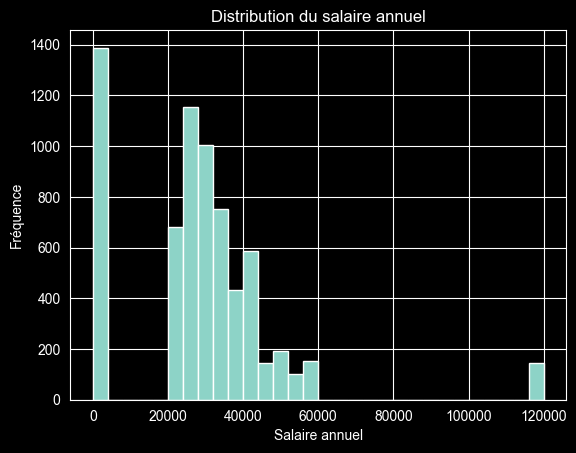

In [20]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["salaire_annuel"].dropna(), bins=30)
plt.xlabel("Salaire annuel")
plt.ylabel("Fréquence")
plt.title("Distribution du salaire annuel")
plt.show()


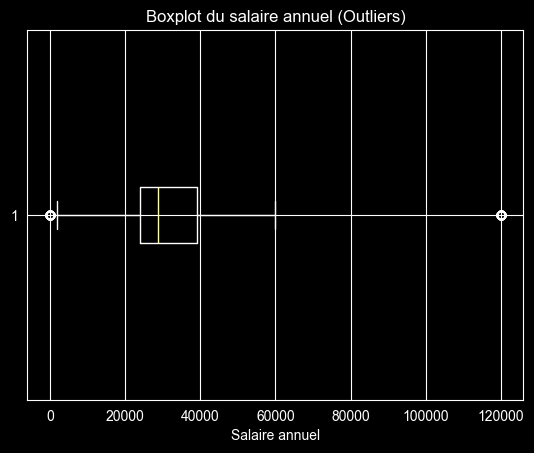

In [21]:
plt.figure()
plt.boxplot(df["salaire_annuel"].dropna(), vert=False)
plt.xlabel("Salaire annuel")
plt.title("Boxplot du salaire annuel (Outliers)")
plt.show()


In [22]:
Q1 = df["salaire_annuel"].quantile(0.25)
Q3 = df["salaire_annuel"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df["salaire_annuel"] < lower_bound) |
    (df["salaire_annuel"] > upper_bound)
]

print("Nombre d'outliers :", outliers.shape[0])


Nombre d'outliers : 1334


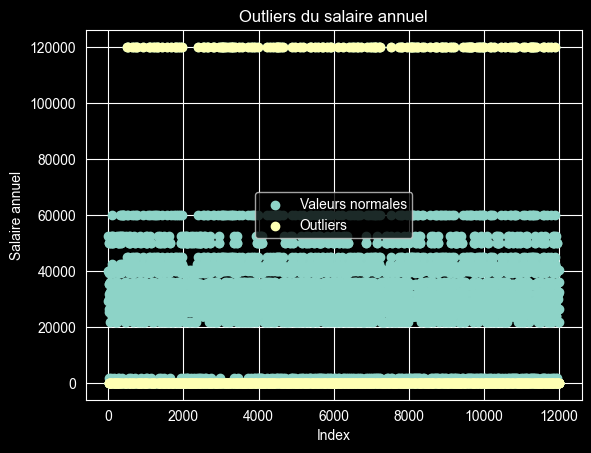

In [23]:
plt.figure()
plt.scatter(
    df.index,
    df["salaire_annuel"],
    label="Valeurs normales"
)

plt.scatter(
    outliers.index,
    outliers["salaire_annuel"],
    label="Outliers"
)

plt.xlabel("Index")
plt.ylabel("Salaire annuel")
plt.title("Outliers du salaire annuel")
plt.legend()
plt.show()


In [24]:
# Remove zeros first
df = df[df['salaire_annuel'] > 0]

# Then cap outliers
df['salaire_annuel'] = df['salaire_annuel'].clip(lower_bound, upper_bound)


In [25]:
Q1 = df["salaire_annuel"].quantile(0.25)
Q3 = df["salaire_annuel"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df["salaire_annuel"] < lower_bound) |
    (df["salaire_annuel"] > upper_bound)
]

print("Nombre d'outliers :", outliers.shape[0])

Nombre d'outliers : 0


In [26]:
import unicodedata
def nettoyer_titre(titre):
    if pd.isna(titre):
        return titre

    # minuscules
    titre = titre.lower()

    # supprimer accents
    titre = unicodedata.normalize('NFKD', titre).encode('ascii', 'ignore').decode('utf-8')

    # supprimer ponctuation et chiffres
    titre = re.sub(r'[^a-z\s]', ' ', titre)

    # supprimer mots inutiles
    mots_inutiles = [
        'h f', 'hf', 'h/f', 'junior', 'senior',
        'confirme', 'confirmee', 'debutant',
        'stage', 'alternance', 'freelance'
    ]
    for mot in mots_inutiles:
        titre = titre.replace(mot, ' ')

    # supprimer espaces multiples
    titre = re.sub(r'\s+', ' ', titre).strip()

    return titre

In [27]:
#df['titre'] = df['titre'].apply(nettoyer_titre)
df['titre'].value_counts()

titre
Technicien Vitrage Itinérant H/F                                          405
Assistant Dentaire Qualifié - CDI H/F                                     294
Technicien Alarme H/F                                                     265
Mécanicien Automobile H/F                                                 251
Technicien BE H/F                                                         250
Électricien Tertiaire - Industriel H/F                                    250
Animateur Commercial Multi-Sites H/F                                      190
Chef d'Équipe VRD H/F                                                     155
Employé de Ménage-Repassage - Avignon H/F                                 155
Chargé de Projet Electronique H/F                                         155
Maroquinier Formation - Reconversion - Louverné 53 H/F                    155
Nettoyeur de Vitres - 30Heures H/F                                        155
Pharmacien Adjoint H/F                                    

In [28]:
df = df.rename(columns={'titre': 'emploi'})


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6732 entries, 1 to 11999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   emploi             6732 non-null   object 
 1   entreprise         6732 non-null   object 
 2   localisation       6732 non-null   object 
 3   date_publication   6732 non-null   object 
 4   temps_travail      6732 non-null   object 
 5   salaire_annuel     6732 non-null   float64
 6   categorie_salaire  6732 non-null   object 
dtypes: float64(1), object(6)
memory usage: 420.8+ KB


In [30]:
df["categorie_salaire"] = df["categorie_salaire"].map({
    "Bas salaire": 0,
    "Haut salaire": 1
})

df["temps_travail"] = df["temps_travail"].map({
    "Temps partiel": 0,
    "Temps plein": 1
})


In [31]:
df['localisation'].value_counts()

localisation
Plougastel-Daoulas - 29       500
Laval - 53                    305
Romans-sur-Isère - 26         299
Cluses - 74                   296
Saint-Grégoire - 35           250
Bruay-la-Buissière - 62       250
Narbonne - 11                 250
Dardilly - 69                 211
Mérignac - 33                 190
Avignon - 84                  155
Béthune - 62                  155
Saumur - 49                   155
Rillieux-la-Pape - 69         155
Saint-Sauveur-d'Aunis - 17    155
Nogent-le-Rotrou - 28         155
Chantepie - 35                150
Caen - 14                     150
Viroflay - 78                 150
Chelles - 77                  149
Marseille 8e - 13             147
Marseille 7e - 13             147
Toulon - 83                   146
Leyrieu - 38                  146
Paris 2e - 75                 146
Lyon 7e - 69                  146
Craon - 53                    145
Sevran - 93                   134
Réalville - 82                133
Sars-et-Rosières - 59         105
N

In [32]:
def split_localisation(df, col_name='localisation'):
    """
    Sépare la colonne localisation en région et département

    Parameters:
    -----------
    df : pandas.DataFrame
        Le dataframe contenant la colonne localisation
    col_name : str
        Le nom de la colonne à splitter (défaut: 'localisation')

    Returns:
    --------
    pandas.DataFrame
        Le dataframe avec deux nouvelles colonnes: 'region' et 'departement'
    """

    # Créer une copie pour éviter les modifications inattendues
    df = df.copy()

    # Fonction pour extraire région et département
    def extract_info(localisation):
        if pd.isna(localisation):
            return pd.Series({'region': None, 'departement': None})

        # Convertir en string au cas où
        loc_str = str(localisation)

        # Pattern pour trouver le numéro de département (chiffres après un tiret)
        match = re.search(r'-\s*(\d+)\s*$', loc_str)

        if match:
            departement = match.group(1)
            # Extraire la région (tout ce qui précède le tiret et le numéro)
            region = loc_str[:match.start()].strip()
        else:
            # Si pas de pattern trouvé, tout est considéré comme région
            region = loc_str.strip()
            departement = None

        return pd.Series({'region': region, 'departement': departement})

    # Appliquer la fonction sur la colonne
    df[['region', 'departement']] = df[col_name].apply(extract_info)

    return df

In [33]:
# Appliquer la fonction sur votre dataframe
df = split_localisation(df, 'localisation')

# Voir le résultat
print(df[['localisation', 'region', 'departement']].head())

              localisation              region departement
1      Cusset - Vichy - 03      Cusset - Vichy          03
2               Tours - 37               Tours          37
5             Solaize - 69             Solaize          69
6                Nord - 59                Nord          59
7  Plougastel-Daoulas - 29  Plougastel-Daoulas          29


In [35]:
df = df.drop(columns='localisation')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6732 entries, 1 to 11999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   emploi             6732 non-null   object 
 1   entreprise         6732 non-null   object 
 2   date_publication   6732 non-null   object 
 3   temps_travail      6732 non-null   int64  
 4   salaire_annuel     6732 non-null   float64
 5   categorie_salaire  6732 non-null   int64  
 6   region             6732 non-null   object 
 7   departement        6732 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 473.3+ KB


In [45]:
df.to_csv("C:/Projects/Project Bi/data/hellowork_etl.csv", index=False, encoding="utf-8")

In [46]:
binary_features = ["categorie_salaire", "temps_travail"]
numeric_features = ["salaire_annuel"]
categorical_features = ["emploi", "entreprise", "region","departement"]

In [38]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [40]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.freq_maps_ = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X, columns=self.columns)
        for col in self.columns:
            self.freq_maps_[col] = X[col].value_counts(normalize=True)
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=self.columns)
        X_encoded = pd.DataFrame()
        for col in self.columns:
            X_encoded[col] = X[col].map(self.freq_maps_[col]).fillna(0)
        return X_encoded.values


In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numeric_features),
        ("cat", FrequencyEncoder(categorical_features), categorical_features),
        ("bin", "passthrough", binary_features),
    ],
    remainder="drop"
)

In [42]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# 1. Création du Pipeline (Preprocessing + PCA)
# n_components=0.95 : On garde 95% de l'information, on supprime le bruit
pipeline_reduction = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95))
])